In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm

import timeit
#import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

### This code checks the 2nd-order convergence of functions.
Currently is only able for check r, sigma, and phi and not for the derivatives. Also it requires 4 sets of arrays, all assumed to be double the resolution (half the step-size) of the last (e.g. N=10,20,40,80)

In [2]:
uscal=1
vscal=1

uscal and vscal reduce arrays by their value in order to prevent memory overflow. Use when h5 files are very large (i.e. >2gB)

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0 or wHD=='True':
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')


True


In [124]:
Elist=[]

funcchoice='r' ###can choose 'r', 'sig, 'phi'

#if funcchoice=='r':
if wHD==True or wHD==1.0 or wHD=='True':
    if funcchoice=='r':
        with h5py.File('rnp.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp = np.asarray(rnpi[::uscal,::vscal])
    if funcchoice=='sig':
        with h5py.File('signp.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp = np.asarray(rnpi[::uscal,::vscal])      
    if funcchoice=='phi':
        with h5py.File('phinp.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp = np.asarray(rnpi[::uscal,::vscal])   
    print(len(rnp),len(rnp[1,:]))
    rnp=rnp[:-1]
    Elist.append(1)
    try:
        if funcchoice=='r':
            with h5py.File('rnp2.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp2 = np.asarray(rnpi[::uscal,::vscal])
        if funcchoice=='sig':
            with h5py.File('signp2.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp2 = np.asarray(rnpi[::uscal,::vscal])      
        if funcchoice=='phi':
            with h5py.File('phinp2.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp2 = np.asarray(rnpi[::uscal,::vscal])   
        print(len(rnp),len(rnp2[1,:]))
        kval=int(len(rnp2)/len(rnp))
        Elist.append(kval)
        rnp2= np.asarray(rnp2[::kval,::kval])
        rnp2=rnp2[:-1]
        print(len(rnp2),len(rnp2[1,:]))
    except:
        pass
    try:
        if funcchoice=='r':
            with h5py.File('rnp3.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp3 = np.asarray(rnpi[::uscal,::vscal])
        if funcchoice=='sig':
            with h5py.File('signp3.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp3 = np.asarray(rnpi[::uscal,::vscal])      
        if funcchoice=='phi':
            with h5py.File('phinp3.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp3 = np.asarray(rnpi[::uscal,::vscal])   
        print(len(rnp),len(rnp3[1,:]))
        kval=int(len(rnp3)/len(rnp))
        Elist.append(kval)
        rnp3= np.asarray(rnp3[::kval,::kval])
        rnp3=rnp3[:-1]
        print(len(rnp3),len(rnp3[1,:]))
    except:
        pass
    try:
        if funcchoice=='r':
            with h5py.File('rnp4.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp4 = np.asarray(rnpi[::uscal,::vscal])
        if funcchoice=='sig':
            with h5py.File('signp4.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp4 = np.asarray(rnpi[::uscal,::vscal])      
        if funcchoice=='phi':
            with h5py.File('phinp4.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp4 = np.asarray(rnpi[::uscal,::vscal])   
        print(len(rnp),len(rnp4[1,:]))
        kval=int(len(rnp4)/len(rnp))
        Elist.append(kval)
        rnp4= np.asarray(rnp4[::kval,::kval])
        #rnp4=rnp4[:-1]
        rnp4=rnp4[:-1]
        print(len(rnp4),len(rnp4[1,:]))
    except:
        pass
    

    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    rnp=np.load('rnp.npy')
    rnp2=np.load('rnp2.npy')
    rnp3=np.load('rnp3.npy')
    rnp4=np.load('rnp4.npy')
    
    
    print("Numpy arrays used")

switchax=float(rnputil[9])
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    rnp2=np.swapaxes(rnp2,0,1)
    rnp3=np.swapaxes(rnp3,0,1)
    rnp4=np.swapaxes(rnp4,0,1)

print('------')
print(len(rnp),len(rnp2),len(rnp3),len(rnp4))    
print(len(rnp[1,:]),len(rnp2[1,:]),len(rnp3[1,:]),len(rnp4[1,:])) 
urange=np.insert(urange,0,0.0)
    
if len(rnp)==len(urange):
    pass
else:
    print(len(rnp),len(urange),len(vrange))
    kval=int(len(urange)/len(rnp))
    print(kval)
    urange=urange[::kval]
    vrange=vrange[::kval]
#urange=urange[:-1]
   
print(len(urange),len(vrange))


24 100
23 200
23 100
23 400
23 100
23 800
23 100
18400 bytes
Hd5 files used
------
23 23 23 23
100 100 100 100
23 100


In [125]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]

print(Nu,Nv)

['152800' '191' '800' '5' '0.31805' '1.0' '0.95' '0.0' 'True' '0.0' 'edd']
2300 points
Runtime: about 0.00 minutes
23 100


In [126]:
print(Elist)

[1, 2, 4, 8]


In [128]:
diff21=np.abs((rnp2-rnp))#/rnp2)
diff32=np.abs((rnp3-rnp2))#/rnp3)
diff43=np.abs((rnp4-rnp3))#/rnp4)
print(urange)

[0.   0.   0.05 0.47 0.89 1.31 1.73 2.15 2.57 2.99 3.41 3.83 4.25 4.67
 5.09 5.51 5.93 6.35 6.77 7.19 7.61 8.03 8.45]


23


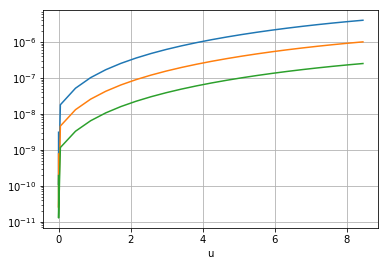

In [132]:
print(Nu)
vind=90
plt.plot(urange,diff21[:,vind])
plt.plot(urange,diff32[:,vind])
plt.plot(urange,diff43[:,vind])
plt.yscale('log')
plt.xlabel('u')
plt.grid()
plt.show()

100


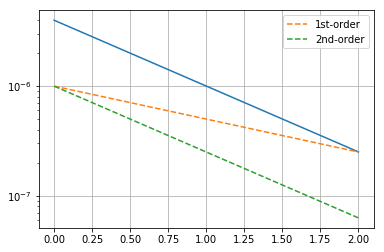

In [130]:
print(Nv)
uind=22
vind=90
klist=np.array([0,1,2])
plt.plot(klist,[diff21[uind][vind],diff32[uind][vind],diff43[uind][vind]])
plt.plot(klist,2.0**(-1*klist)*10**(-6),'--',label='1st-order')
plt.plot(klist,2.0**(-2*klist)*10**(-6),'--',label='2nd-order')

plt.yscale('log')
plt.grid()
plt.legend(loc='best')
#plt.plot(vrange,diff32[uind])
#plt.plot(vrange,diff43[uind])
plt.show()

23 100


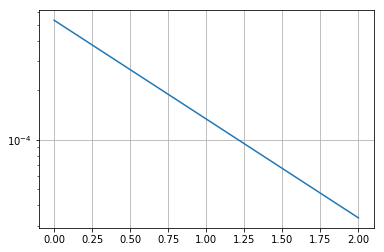

In [141]:
print(Nu,Nv)
uind=22
vind=90
klist=np.array([0,1,2])
Errorlist=4.0/3.0*(dv0)**(-2.0)*np.array([diff21[uind][vind],diff32[uind][vind],diff43[uind][vind]])
plt.plot(klist,Errorlist)
#plt.plot(klist,2.0**(-1*klist)*10**(-6),'--',label='1st-order')
#plt.plot(klist,2.0**(-2*klist)*10**(-6),'--',label='2nd-order')

plt.yscale('log')
plt.grid()
#plt.legend(loc='best')
#plt.plot(vrange,diff32[uind])
#plt.plot(vrange,diff43[uind])
plt.show()